## Show Us The Data

![](https://storage.googleapis.com/kaggle-competitions/kaggle/25925/logos/header.png)

This notebook shares several utilities to make it easy to navigate through your data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

# Default Setting 
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

train = pd.read_csv('../input/coleridgeinitiative-show-us-the-data/train.csv')


## Dataset Label Distribution

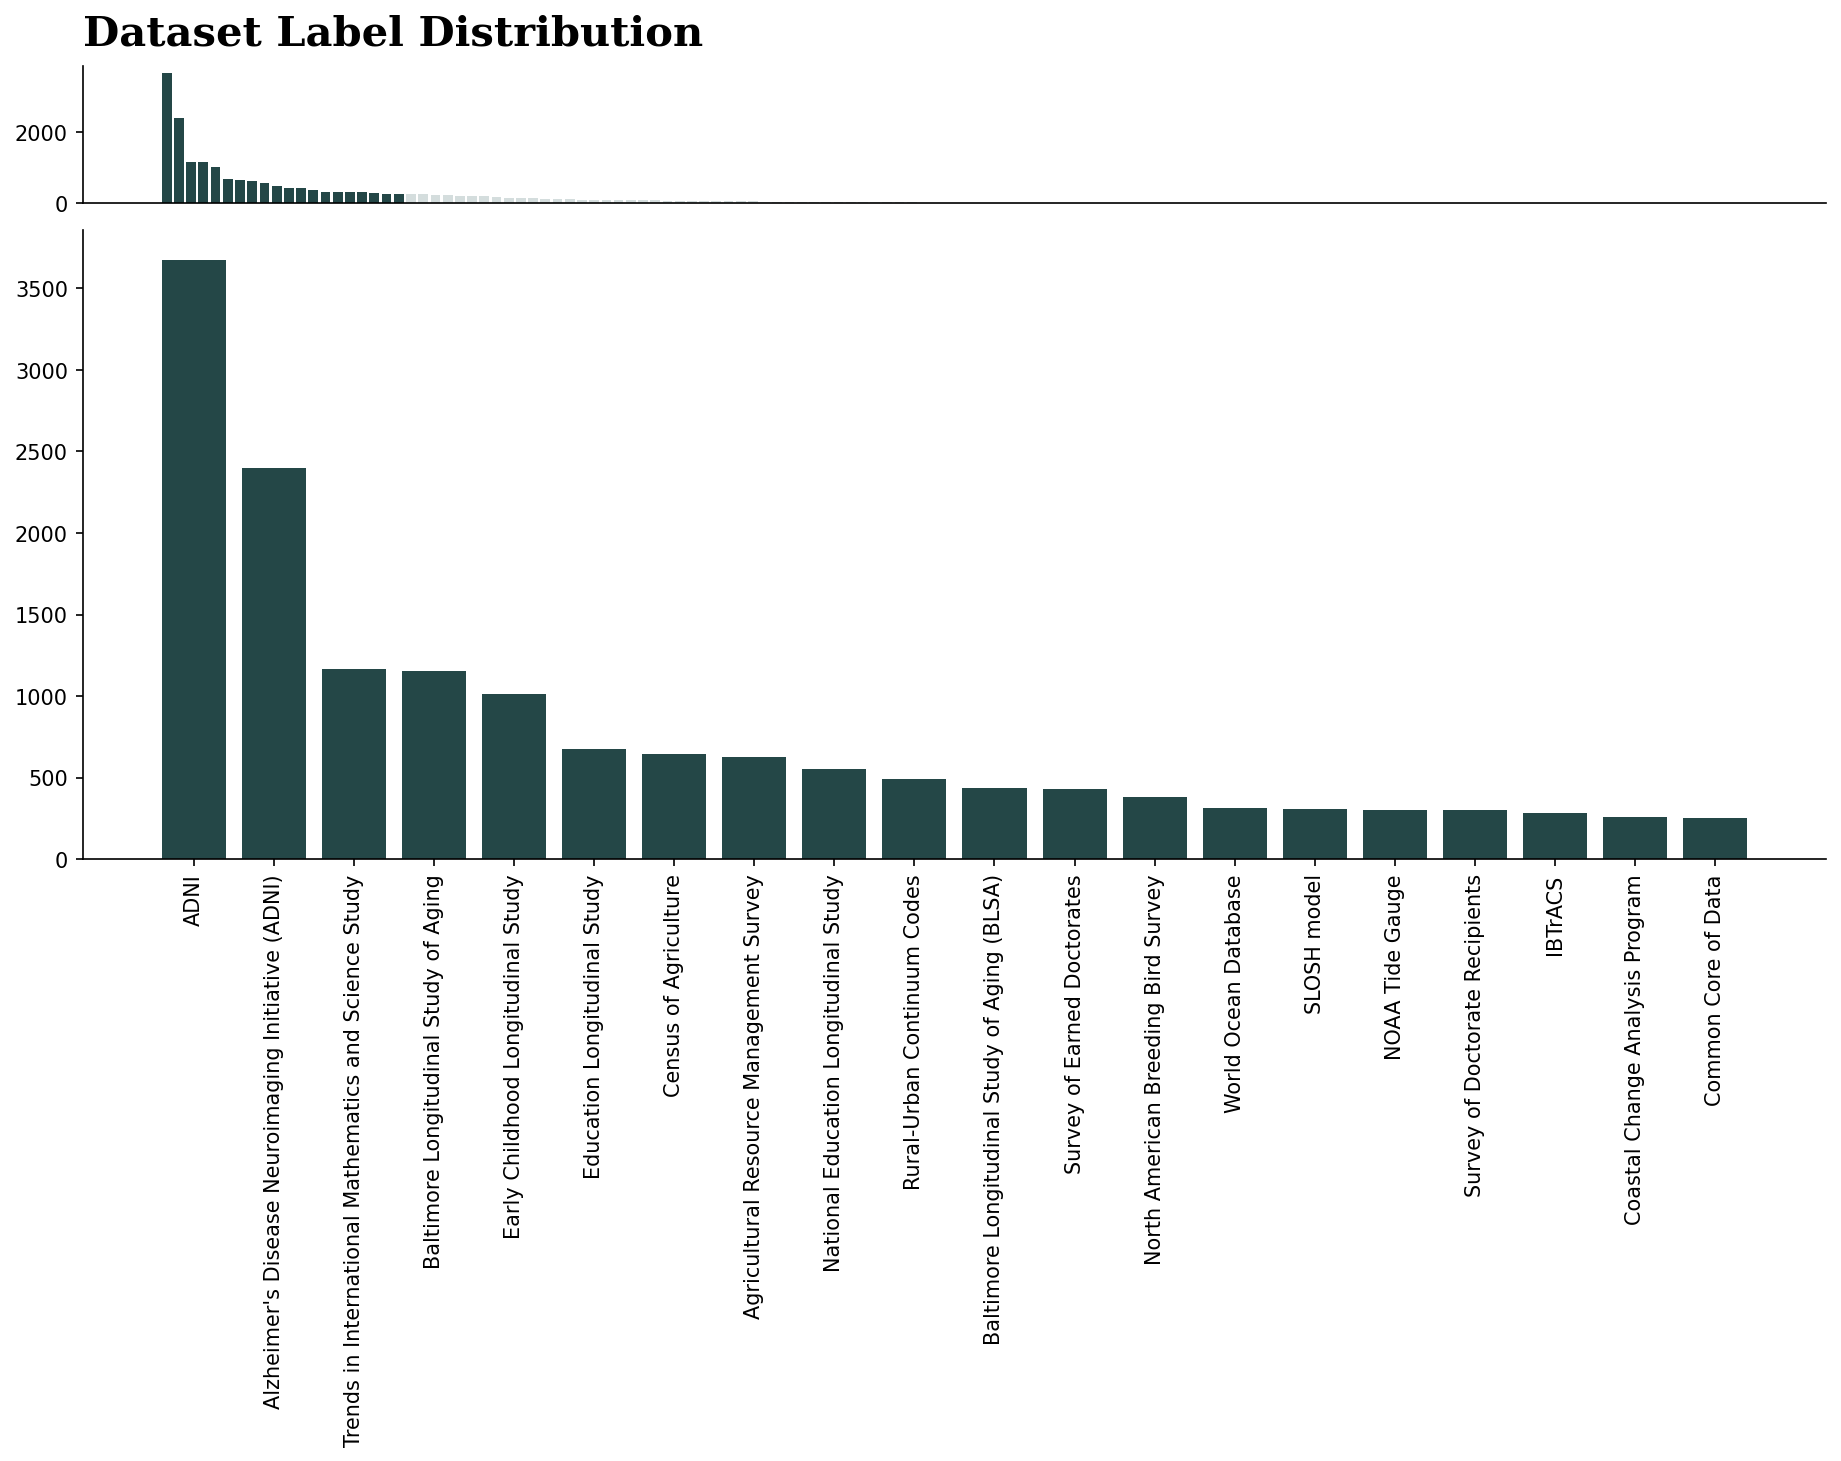

In [2]:
dataset_label = train['dataset_label'].value_counts()[:20]
fig = plt.figure(figsize=(15, 7))

gs = fig.add_gridspec(5, 6)

ax1 = fig.add_subplot(gs[0,:])
dataset_label = train['dataset_label'].value_counts()
ax1.bar(dataset_label.index, dataset_label,
       color=['#244747']*20 + ['#d4dddd']*(len(dataset_label) - 20)
       )
ax1.set_xticks([])


ax2 = fig.add_subplot(gs[1:,:])
dataset_label = train['dataset_label'].value_counts()[:20]
ax2.bar(dataset_label.index, dataset_label,
        color='#244747'
       )
ax2.set_xticks(range(len(dataset_label.index)))
ax2.set_xticklabels(dataset_label.index, rotation = 90)


fig.text(0.125,0.9,'Dataset Label Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

## Single Data Loading Utils

**Feel Free To Use**

> Please be sure to leave a reference when using code or taking ideas in my visualizations.

- Convert Json to DataFrame
- Interactive Table (Comportable to Read)

In [3]:
import plotly.graph_objects as go
from fastcore.all import *

def read_single_file(df, traintest='train', idx=0):
    dataset_path = Path('../input/coleridgeinitiative-show-us-the-data')
    data = pd.DataFrame((dataset_path/traintest/(df['Id'][idx]+'.json')).read_json())
    fig = go.Figure(data=[go.Table(
        columnwidth = [100,400],
        header=dict(values=['Title', 'Article'],
                    line_color='darkslategray',
                    fill_color='darkblue',
                    align='left',  
                    font=dict(color='white', size=12)
                   ),
        cells=dict(values=data.T, 
                   line_color='darkslategray',
                   fill_color=['lightgray','white'],
                   align='left'))
    ])

    dstitle, dslabel = train['dataset_title'][idx], train['dataset_label'][idx]
    fig.update_layout(title_text=f'{traintest}[{idx}] |{dstitle} | {dslabel} ')
    fig.update_layout(width=800, height=1000)
    fig.show()

In [4]:
read_single_file(train, 'train', 0)

In [5]:
read_single_file(train, 'train', 2)

## Dataset Title > Dataset Label (Treemap)

In [6]:
train['cnt'] = 1
fig = px.treemap(train, path=['dataset_title', 'dataset_label'], values='cnt',
                width=1000, height=700, title="Dataset Title > Dataset Label")
fig.show()